# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [ ]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Science Project 5/online_retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_backup = df.copy()
df_backup.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
len(df)

541909

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# e.g year extraction, data type of the feature must be datetime64[ns]
df['InvoiceDate'][:5].dt.year

0    2010
1    2010
2    2010
3    2010
4    2010
Name: InvoiceDate, dtype: int32

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
#df.to_csv("Online_Retail.csv", index= False)

In [ ]:
print("Total data:", len(df))

Total data: 541909


In [ ]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
weird_data = df[(df.Quantity <= 0) |( df.UnitPrice <= 0)]

In [ ]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [ ]:
# Check missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Null value of CustomerID in percent
(135080 / 541909) * 100

24.926694334288598

We could see that there is missing value in `CustomerID` columns. We could remove those missing values.

In [ ]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Then we could do some descriptive statistic.

In [ ]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [ ]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Then just remove those anomaly data

In [ ]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Now we're good to go. Lets do some data exploration!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [ ]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [ ]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [ ]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

67.5 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

24.1 ms ± 771 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# (82.2 - 15.5)/82.2 , (1 - ((82.2 - 15.5)/82.2)) * 60

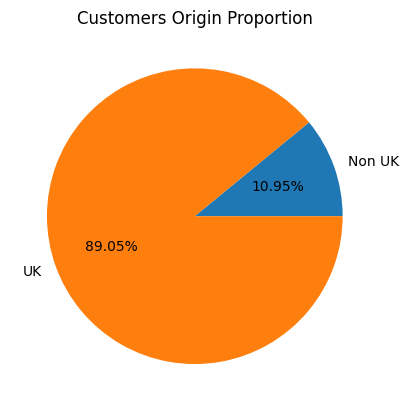

In [ ]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [ ]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34


Then plot the trendline.

In [ ]:
import matplotlib.dates as mdates

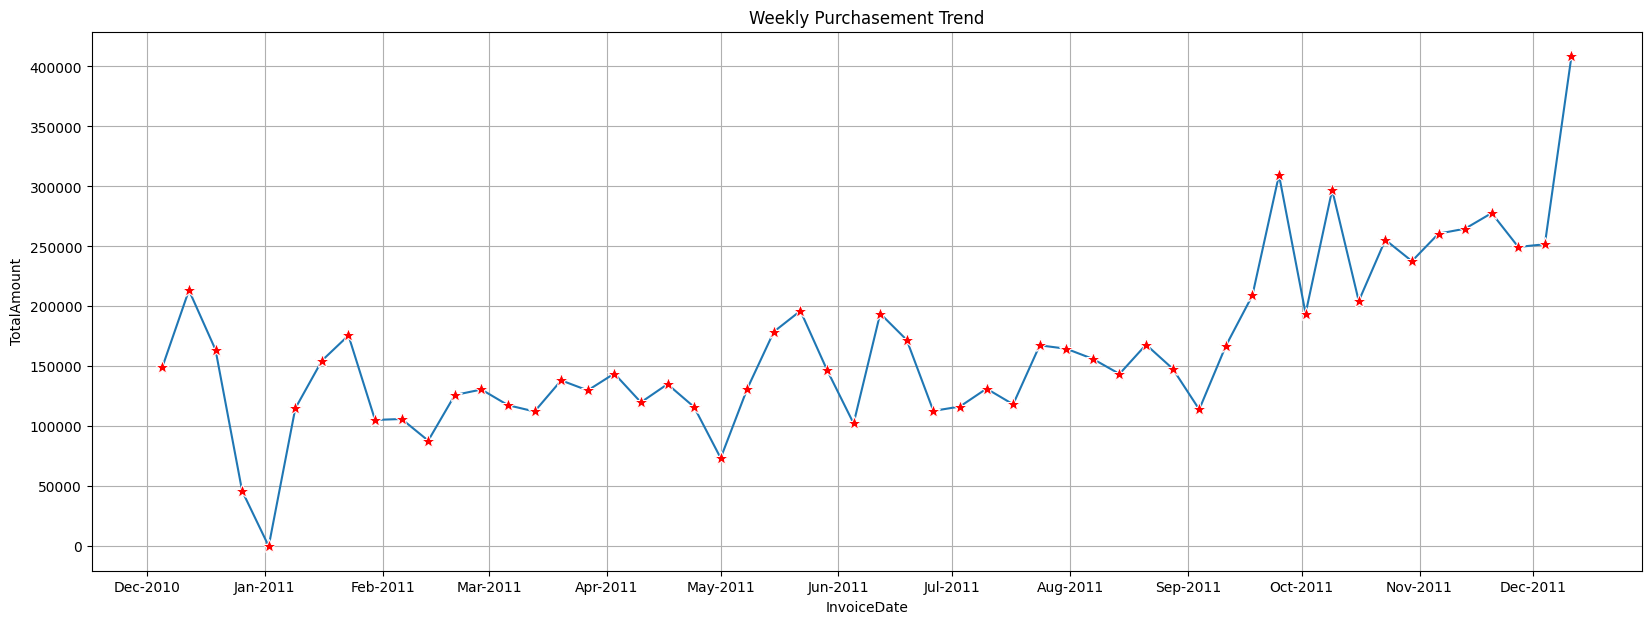

In [ ]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum() # invoicedate dapat digunakan karena sudah bertipe datetime64[ns] -> timestamps

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index, # index adalah invoiceDate karena digroupby
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [ ]:
weekly_purchasements

InvoiceDate
2010-12-05    149386.330
2010-12-12    213447.720
2010-12-19    163770.730
2010-12-26     46109.110
2011-01-02         0.000
2011-01-09    114865.270
2011-01-16    154714.940
2011-01-23    175757.980
2011-01-30    105288.770
2011-02-06    106095.230
2011-02-13     88015.420
2011-02-20    126050.400
2011-02-27    130687.360
2011-03-06    117600.820
2011-03-13    112338.000
2011-03-20    138278.820
2011-03-27    129918.430
2011-04-03    143977.030
2011-04-10    119961.920
2011-04-17    135142.201
2011-04-24    116090.020
2011-05-01     73474.560
2011-05-08    131329.180
2011-05-15    178850.250
2011-05-22    196269.920
2011-05-29    146976.900
2011-06-05    102371.900
2011-06-12    194019.080
2011-06-19    171940.300
2011-06-26    112818.820
2011-07-03    116479.920
2011-07-10    131383.740
2011-07-17    118297.880
2011-07-24    167519.810
2011-07-31    164667.901
2011-08-07    156185.190
2011-08-14    143652.210
2011-08-21    168080.690
2011-08-28    148051.260
2011-09-04   

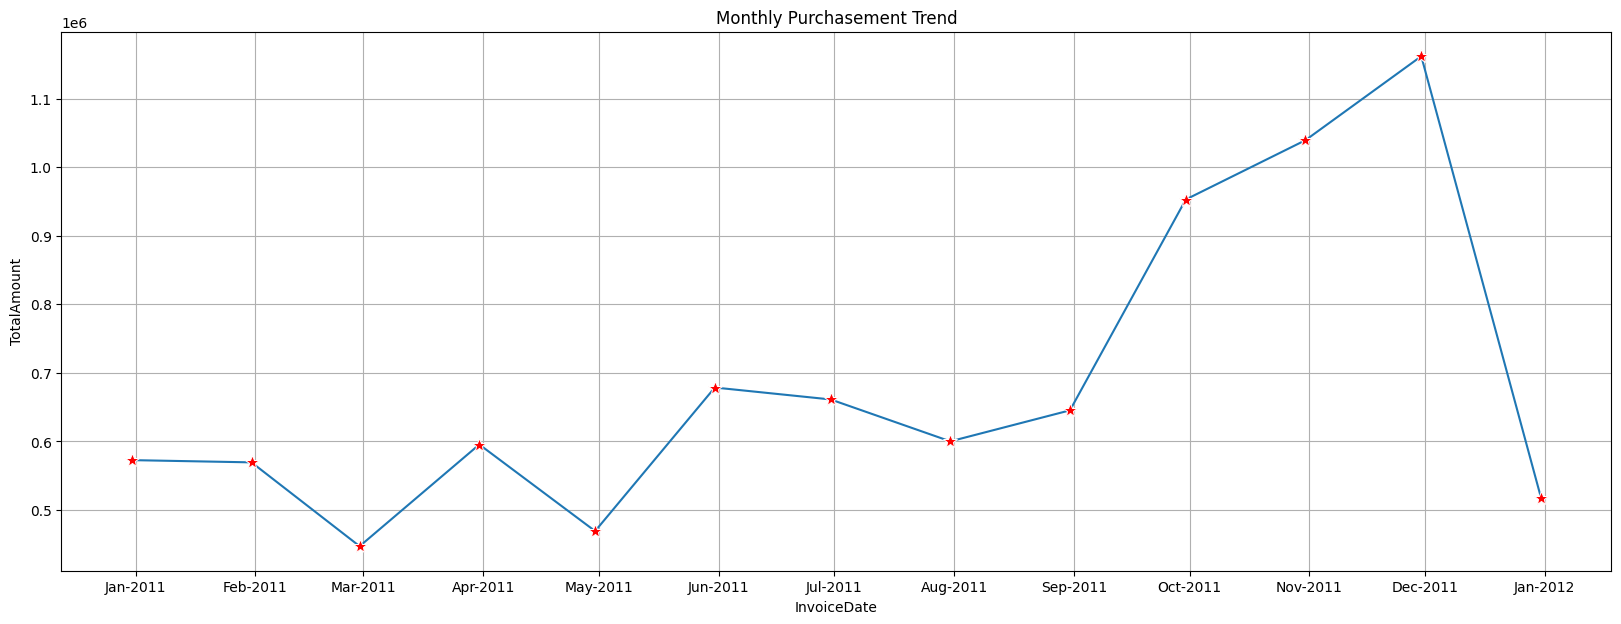

In [ ]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index, # index adalah invoiceDate karena digroupby
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [ ]:
# %%sql
# SELECT
#   'CustomerID'
#   MAX('InvoiceDate')
# FROM
#   df
# GROUP BY
#   'CustomerID'

In [ ]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
12352.0   2011-11-03 14:37:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
12356.0   2011-11-17 08:40:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [ ]:
recency = max(recency) - recency # recency kecil adalah yang baik, menunjukkan bahwa transaksi baru saja dilakukan
recency.head(10)

CustomerID
12346.0   325 days 02:49:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [ ]:
# Get customer's recency in days
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

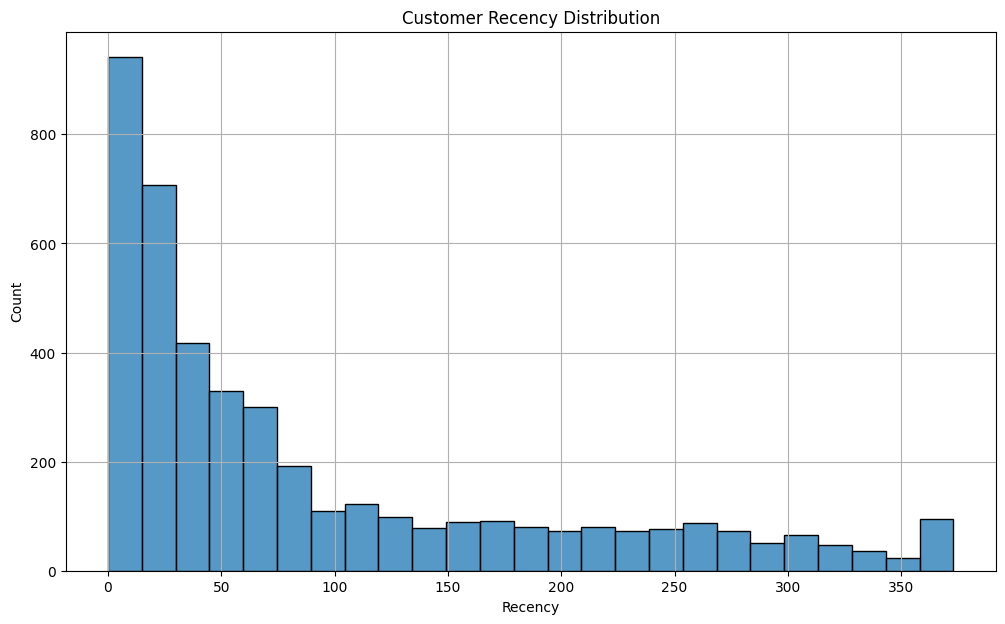

In [ ]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [ ]:
# %%sql
# SELECT
#   'CustomerID'
#   COUNT('InvoiceNo')
# FROM
#   df
# GROUP BY
#   'CustomerID'

In [ ]:
# Count frequency
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

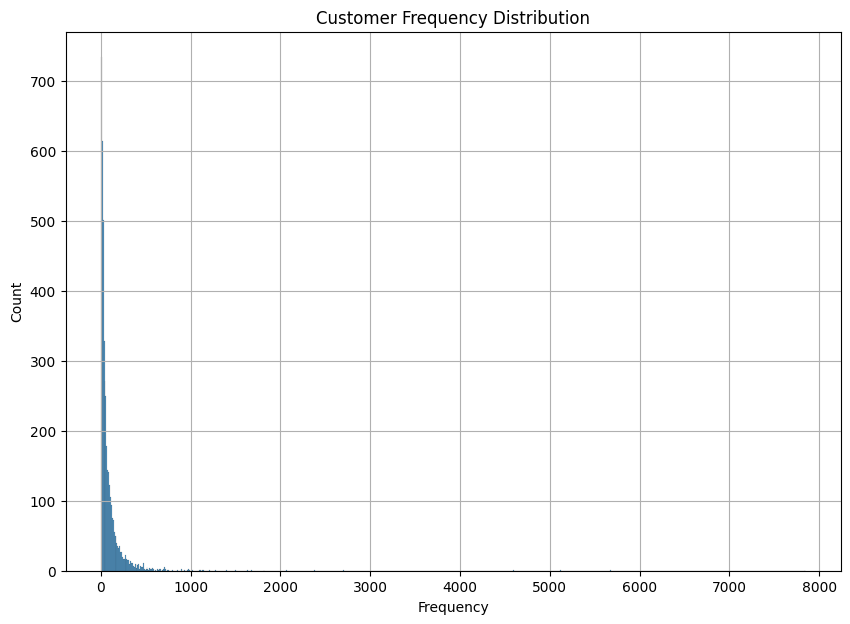

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

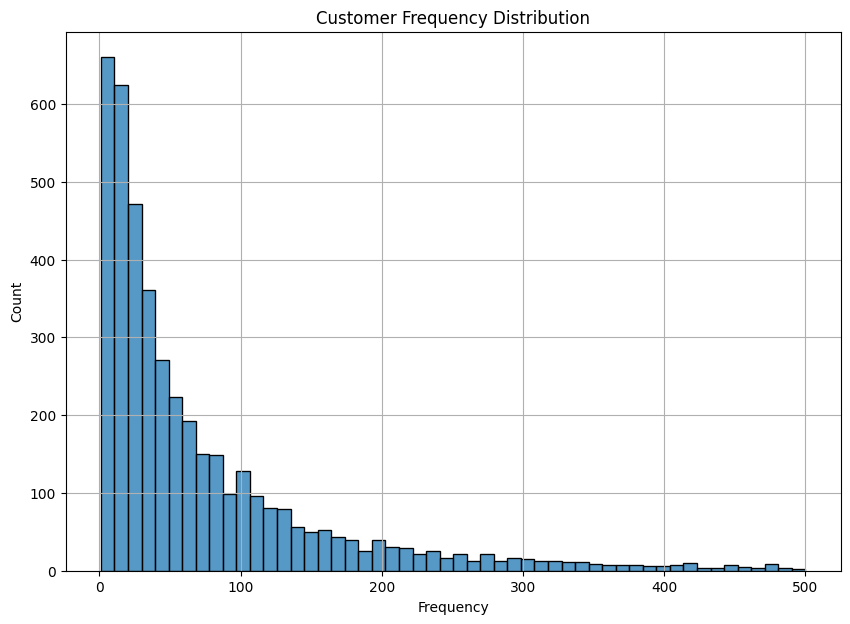

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

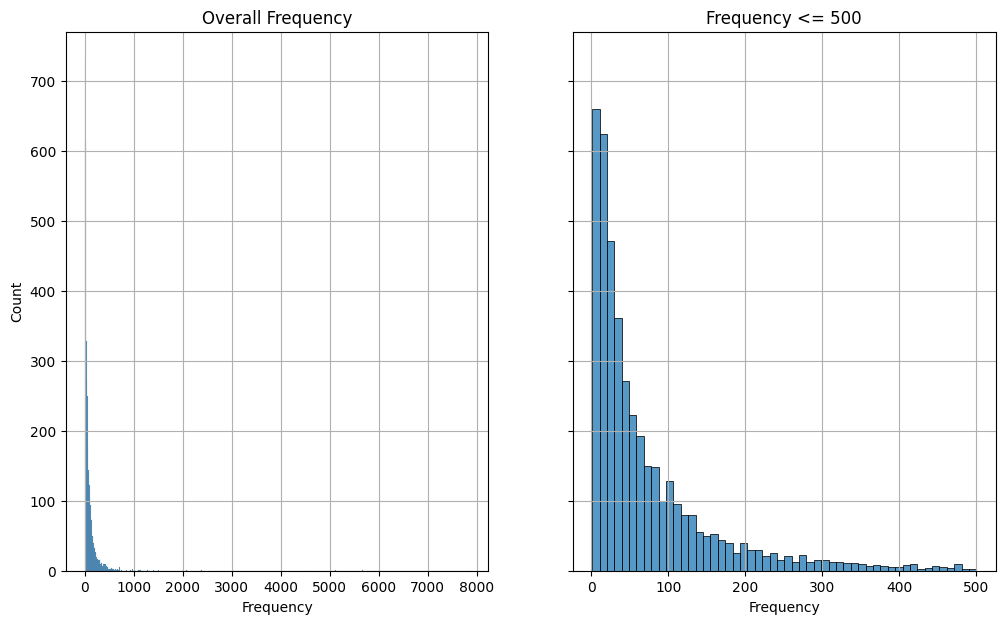

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7), sharey=True)
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [ ]:
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

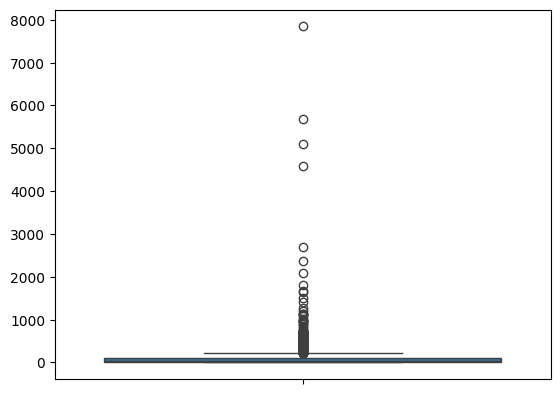

In [ ]:
sns.boxplot(frequency.values);

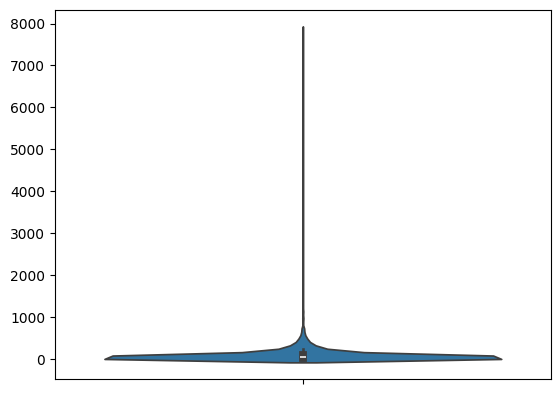

In [ ]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [ ]:
# %%sql
# SELECT
#   'CustomerID'
#   SUM('TotalAmount')
# FROM
#   df
# GROUP BY
#   'CustomerID'

In [ ]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

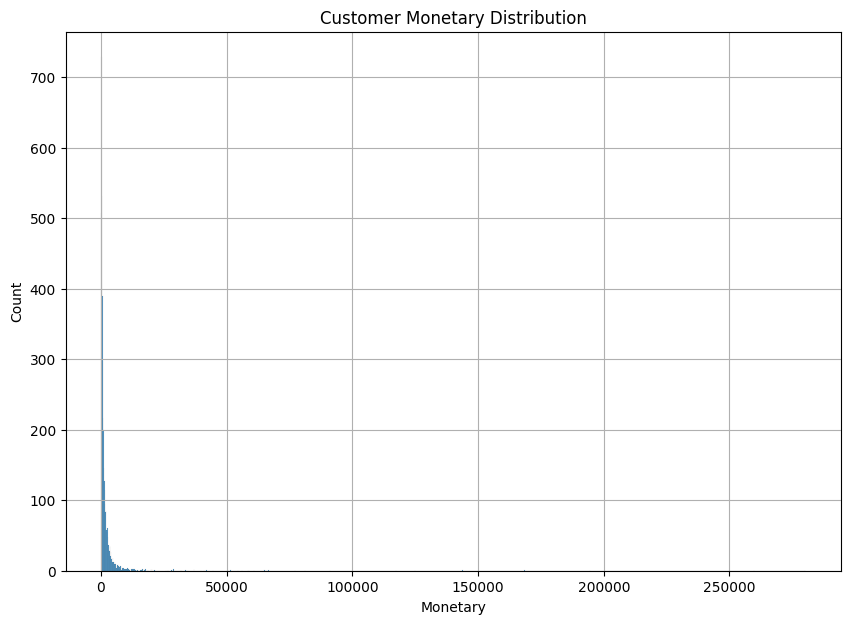

In [ ]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

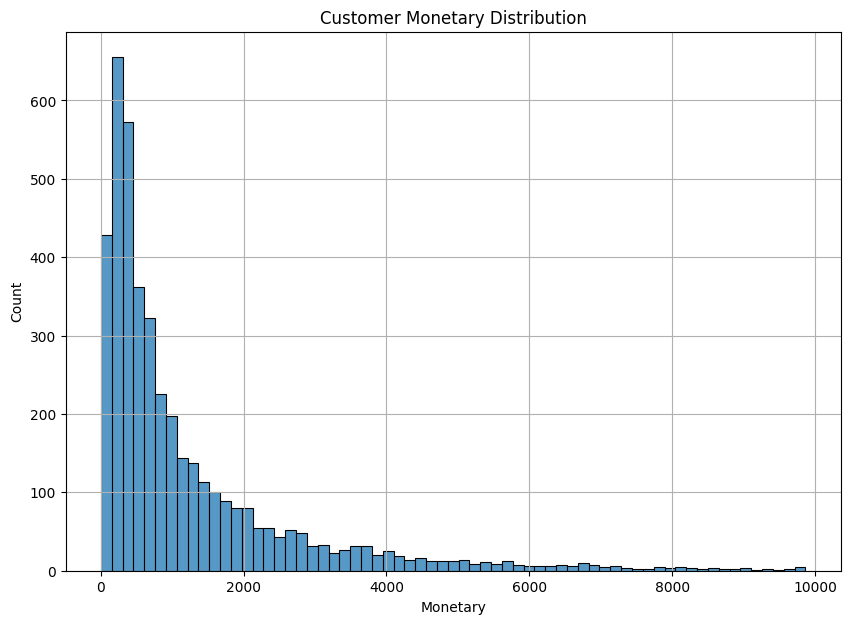

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [ ]:
# pandas chaining
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
).head(10)

In [ ]:
df.groupby(['CustomerID', 'Country_isUK']).size() # the last col is the purchases amount

CustomerID  Country_isUK
12346.0     UK                 1
12347.0     Non UK           182
12348.0     Non UK            31
12349.0     Non UK            73
12350.0     Non UK            17
12352.0     Non UK            85
12353.0     Non UK             4
12354.0     Non UK            58
12355.0     Non UK            13
12356.0     Non UK            59
12357.0     Non UK           131
12358.0     Non UK            19
12359.0     Non UK           248
12360.0     Non UK           129
12361.0     Non UK            10
12362.0     Non UK           266
12363.0     Non UK            23
12364.0     Non UK            85
12365.0     Non UK            22
12367.0     Non UK            11
12370.0     Non UK           167
12371.0     Non UK            63
12372.0     Non UK            52
12373.0     Non UK            14
12374.0     Non UK            33
12375.0     Non UK            17
12377.0     Non UK            77
12378.0     Non UK           219
12379.0     Non UK            40
12380.0     Non UK

### RFM Table

In [ ]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40
12352.0,Non UK,35,85,2506.04
12353.0,Non UK,203,4,89.00
12354.0,Non UK,231,58,1079.40
12355.0,Non UK,213,13,459.40


### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [ ]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True,
    dtype = int # untuk mengubah format ecoder menjadi 0,1 bukan true-false
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,1,182,4310.00,0
12348.0,74,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,309,17,334.40,0


### Scaling

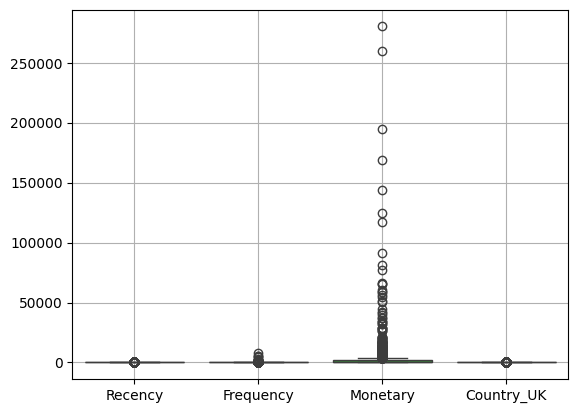

In [ ]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


In [ ]:
df_scaled.mean()

Recency       2.702618e-17
Frequency     1.801745e-17
Monetary      1.801745e-17
Country_UK    0.000000e+00
dtype: float64

In [ ]:
df_scaled.var(ddof=0) # ddof (degree of freedom) untuk menscale supaya rata2 1

Recency       1.0
Frequency     1.0
Monetary      1.0
Country_UK    1.0
dtype: float64

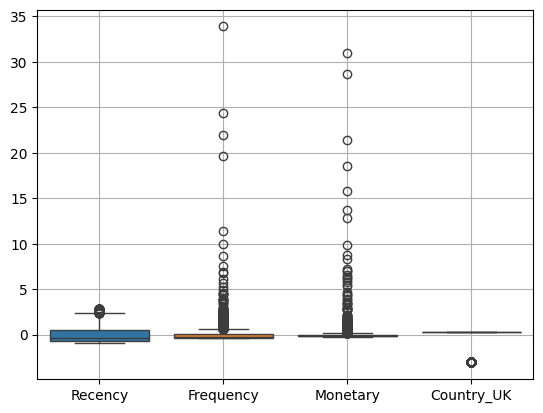

In [ ]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

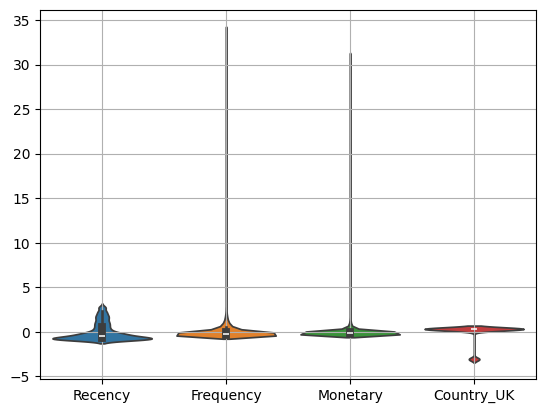

In [ ]:
# Plot scaled data
sns.violinplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

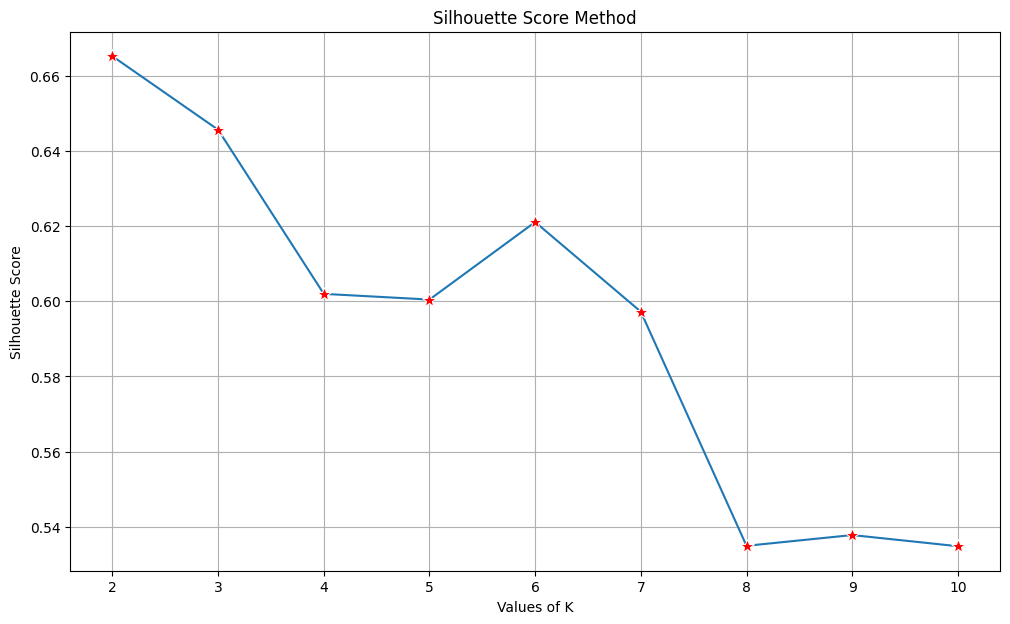

In [ ]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Using silhouette score, the best K is either 2 or 6 (higher silhouette score is better)

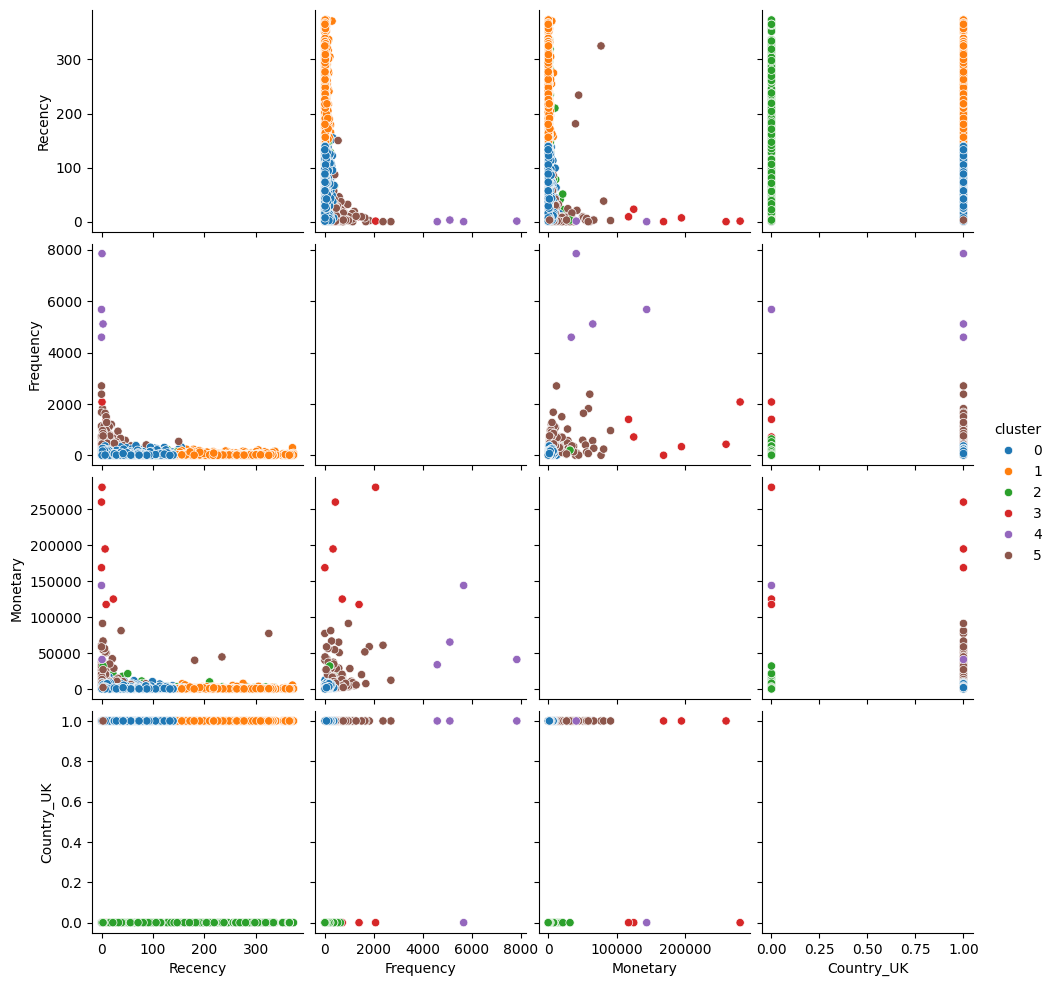

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [ ]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0            1             2              3  \
Recency   mean       42.676884   246.776618     95.405797       6.666667   
          std        36.313016    65.636727    104.638705       8.869423   
          min         0.000000   143.000000      0.000000       0.000000   
          q25        14.000000   189.000000     18.000000       0.250000   
          median     31.000000   242.000000     52.000000       4.000000   
          q75        64.000000   296.000000    136.500000       8.500000   
          max       155.000000   373.000000    373.000000      23.000000   
Frequency mean       76.270826    27.689979     81.396135     826.833333   
          std        74.030983    32.176026     96.304061     771.620481   
          min         1.000000     1.000000      1.000000       3.000000   
          q25        22.000000     8.250000     21.250000     360.500000   
          median     51.000000    18.000000     45.000000     572.500000   
          q75       107.000000    33.000000    101.000000    1228.500000   
          max       385.000000   297.000000    638.000000    2076.000000   
Monetary  mean     1341.293935   450.793070   2262.538913  190863.461667   
          std      1592.871914   610.367153   3479.689136   67791.993010   
          min         6.200000     3.750000     51.560000  117379.630000   
          q25       371.700000   163.225000    459.650000  135804.022500   
          median    795.120000   305.515000   1025.700000  181511.645000   
          q75      1720.300000   505.542500   2659.962500  243380.672500   
          max     17654.540000  7832.470000  31906.820000  280206.020000   

cluster                       4             5  
Recency   mean         1.000000     15.234973  
          std          1.414214     35.305176  
          min          0.000000      0.000000  
          q25          0.000000      2.000000  
          median       0.500000      6.000000  
          q75          1.500000     16.000000  
          max          3.000000    325.000000  
Frequency mean      5807.000000    535.360656  
          std       1429.730044    358.078267  
          min       4595.000000      1.000000  
          q25       4982.000000    367.000000  
          median    5393.000000    450.000000  
          q75       6218.000000    589.500000  
          max       7847.000000   2700.000000  
Monetary  mean     70925.287500  13085.065738  
          std      50424.336433  16313.461152  
          min      33719.730000   1093.650000  
          q25      39173.610000   4014.945000  
          median   53078.180000   6923.130000  
          q75      84829.857500  13213.210000  
          max     143825.060000  91062.380000

cluster 3 & 4 memiliki RFM yang baik

In [ ]:
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster
CustomerID,,,,,
12346.0,325,1,77183.60,1,5
12347.0,1,182,4310.00,0,2
12348.0,74,31,1797.24,0,2
12349.0,18,73,1757.55,0,2
12350.0,309,17,334.40,0,2
12352.0,35,85,2506.04,0,2
12353.0,203,4,89.00,0,2
12354.0,231,58,1079.40,0,2
12355.0,213,13,459.40,0,2


In [ ]:
df.CustomerID.nunique()

4338

In [ ]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

cluster  Country_UK
0        1             2773
1        1              958
2        0              414
3        0                3
         1                3
4        0                1
         1                3
5        1              183
Name: Recency, dtype: int64

In [ ]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Frequency"].count()

cluster  Country_UK
0        1             2773
1        1              958
2        0              414
3        0                3
         1                3
4        0                1
         1                3
5        1              183
Name: Frequency, dtype: int64

That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [ ]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

0.25     17.0
0.50     50.0
0.75    141.0
Name: Recency, dtype: float64

In [ ]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,1,5,Bad_R
12347.0,1,182,4310.00,0,2,High_R
12348.0,74,31,1797.24,0,2,Low_R
12349.0,18,73,1757.55,0,2,Medium_R
12350.0,309,17,334.40,0,2,Bad_R
12352.0,35,85,2506.04,0,2,Medium_R
12353.0,203,4,89.00,0,2,Bad_R
12354.0,231,58,1079.40,0,2,Bad_R
12355.0,213,13,459.40,0,2,Bad_R


In [ ]:
df_result_kmeans["Recency_Quality"].value_counts()

Recency_Quality
Low_R       1092
Medium_R    1092
Bad_R       1088
High_R      1066
Name: count, dtype: int64

In [ ]:
# recency_quatile_scoring: rqs
def rqs_if_else(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_if_else)

1.63 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import numpy as np

def rqs_np(recency_score):
    thresholds = [17, 50, 141]
    labels = ["High_R", "Medium_R", "Low_R", "Bad_R"]
    return labels[np.digitize(recency_score, thresholds, right=True)]

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_np)

25.7 ms ± 543 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
data_recency = df_result_kmeans['Recency'].values

In [ ]:
%%timeit
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

31.1 ms ± 721 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
pd.Series(np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))).value_counts()

Low_R    1092
Mediu    1092
Bad_R    1088
High_    1066
Name: count, dtype: int64

In [ ]:
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

array(['Bad_R', 'High_', 'Low_R', ..., 'High_', 'High_', 'Mediu'],
      dtype='<U5')

# Question

1. (30 point) Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya: a) Siapa top 5 customer dengan pembelian terbanyak? b) Kapan waktu pembelian dengan jumlah customer terbanyak? (Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst). EDA juga bisa dilakukan menggunakan business question lain.
2. (30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?
3. (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

# Soal No. 1

## a. 5 Customer dengan pembelian terbanyak

In [ ]:
# Menghitung total pembelian @customer
jmlPembelian = df.groupby(['CustomerID'])['Quantity'].sum()

# Sorting custorem dengan total pembelian tertinggi
sortTop = jmlPembelian.sort_values(ascending=False)
sortTop.head()

CustomerID
14646.0    196915
16446.0     80997
14911.0     80265
12415.0     77374
12346.0     74215
Name: Quantity, dtype: int64

## b. Waktu pembelian dengan jumlah customer terbanyak

In [ ]:
# Menghitung jumlah customer @waktu
jam = df.groupby(df['InvoiceDate'].dt.hour)['CustomerID'].nunique()
hari = df.groupby(df['InvoiceDate'].dt.dayofweek)['CustomerID'].nunique()
minggu = df.groupby(df['InvoiceDate'].dt.isocalendar().week)['CustomerID'].nunique()
bulan = df.groupby(df['InvoiceDate'].dt.month)['CustomerID'].nunique()
tahun = df.groupby(df['InvoiceDate'].dt.year)['CustomerID'].nunique()

# Mendapatkan waktu pembelian customer tertinggi
topJam = jam.idxmax()
topHari = hari.idxmax()
topMinggu = minggu.idxmax()
topBulan = bulan.idxmax()
topTahun = tahun.idxmax()

# Formatting
topJamF = pd.to_datetime(topJam, format='%H').time()
topHariF = pd.to_datetime(topHari, format='%w').strftime('%A')
topBulanF = pd.to_datetime(topBulan, format='%m').strftime('%B')

# Show
print("Hour:", topJamF)
print("Day:", topHariF)
print("Week:", topMinggu)
print("Month:", topBulanF)
print("Year:", topTahun)

Hour: 12:00:00
Day: Monday
Week: 48
Month: November
Year: 2011


# Soal No. 2

Karakteristik masing-masing cluster

In [ ]:
cGroup = (
    df_result_kmeans
    .groupby('cluster')
    .agg({'Recency':'mean',
          'Frequency':'mean',
          'Monetary':'mean'})
    .reset_index()
)

cGroup

,cluster,Recency,Frequency,Monetary
0,0,42.676884,76.270826,1341.293935
1,1,246.776618,27.689979,450.793070
2,2,95.405797,81.396135,2262.538913
3,3,6.666667,826.833333,190863.461667
4,4,1.000000,5807.000000,70925.287500
5,5,15.234973,535.360656,13085.065738


Berdasarkan nilai rata-rata dari setiap poin RFM menunjukkan:

1. Cluster 0
* Cluster 0 memiliki karakteristik utama berupa Recency yang relatif rendah, Frequency yang tinggi, dan Monetary yang sedang. Menunjukkan customer cluster 0  cenderung berbelanja secara teratur dengan jarak waktu yang relatif pendek antara pembeliannya. Meskipun frekuensi pembelian tinggi, nilai rata-rata pembelian tidak terlalu tinggi, menunjukkan kecenderungan untuk pembelian dalam jumlah kecil namun konsisten.
* Promo yg cocok: Diskon tambahan, & poin reward

2. Cluster 1
* Cluster 1 memiliki karakteristik utama berupa Recency yang tinggi, Frequency yang rendah, Monetary yang rendah. Menunjukkan customer dalam cluster 1 memiliki jeda waktu yang lama antara pembeliannya, dengan frekuensi pembelian dan nilai rata-rata pembelian yang rendah. Ini mencerminkan tingkat keterlibatan yang rendah dan kurangnya pengeluaran dari customer dalam cluster ini.
* Promo yg cocok: Diskon besar
3. Cluster 2
* Cluster 2 memiliki karakteristik utama berupa Recency yang sedang, Frequency yang tinggi, Monetary yang tinggi. Dengan demikian, Customer menunjukkan tingkat keterlibatan yang stabil dengan produk yang dibeli, dengan frekuensi pembelian yang tinggi dan nilai rata-rata pembelian yang juga tinggi, menandakan customer dalam cluster 2 cenderung melakukan pembelian dalam jumlah besar.
* Promo yg cocok: Program Loyalti Pelanggan
4. Cluster 3
* Cluster 3 memiliki karakteristik utamma berupa Recency yang sangat rendah, Frequency yang sangat tinggi, Monetary yang sangat tinggi. Menunjukkan bahwa Customer dalam cluster 3 sering melakukan pembelian bahkan setiap hari, denngan frekuensi pembelian yang sangat tinggi, dan nilai rata-rata pembelian yang juga sangat tinggi, menunjukkan customer dalam cluster 3 merupakan pelanggan setia dan aktif serta cenderung melakukan pembelian dalam jumlah besar secara teratur.
* Promo yg cocok: Hadiah eksklusif
5. Cluster 4
* Cluster 3 memiliki karakteristik utama berupa Recency yang sangat rendah, Frequency yang sangat tinggi, Monetary yang tinggi. Menunjukkan bahwa Customer dalam cluster 4 memiliki jarak waktu yang sangat pendek antara pembeliannya, dengan frekuensi pembelian dan rata-rata nilai pembeluan yang sangat tinggi, menunjukkan customer cluster 4 adalah pelanggan setia yang sangat aktif terlibat dan cenderung melakukan pembelian dalam jumlah besar secara teratur.
* Promo yg cocok: Program Reffral, & Program premium.
6. Cluster 5
*  Cluster 3 memiliki karakteristik utama berupa Recency yang rendah, Frequency yang sedang, Monetary yang sedang. Meninjukkan Customer dalam cluster 5 memiliki tingkat keterlibatan yang stabil dengan jarak waktu antara pembelian-pembelian yang relatif rendah, dan frekuensi pembelian serta nilau rata-rata pembelian yang sedang.
* Kupon Belanja, & diskon kilat


# Soal No. 3

Segmentasi Customer Non-UK

In [ ]:
nonUK = (
    df_result_kmeans[df_result_kmeans['Country_UK'] == 0]
    .groupby('cluster')
    .agg({'Recency':'mean',
          'Frequency':'mean',
          'Monetary':'mean'})
    .reset_index()
)

nonUK

,cluster,Recency,Frequency,Monetary
0,2,95.405797,81.396135,2262.538913
1,3,11.000000,1396.666667,174166.726667
2,4,0.000000,5675.000000,143825.060000


Terdapat 3 cluster segmentasi customer Non-UK
1. Cluster 2
  
  * Recency 95 hari.
  * Frequency 81 kali.
  * Monetary 2262,54.

  Cluster 2 memiliki rata-rata waktu sejak pembelian terakhir yang relatif lama yaitu 95 hari dibandingkan dengan cluster non-UK lainnya, menunjukkan bahwa customer dalam cluster 2 ini kurang aktif secara keseluruhan, dengan rata-rata frekuensi pembelian sebanyak 81 kali dan rata-rata nilai pembelian hanya sebesar 2262,54, ini menunjukkan bahwa mereka termasuk dalam segmen customer yang kurang menghabiskan banyak uang atau mungkin mengalami penurunan minat dalam melakukan pembelian dibandingkan dengan cluster non-UK lainnya.

2. Cluster 3

  * Recency 11 hari.
  * Frequency 1396 kali.
  * Monetary 174166,73.

  Cluster 3 memiliki rata-rata waktu sejak pembelian terakhir yang cukup rendah (11 hari) dan rata-rata frekuensi pembelian yang tinggi yaitu 1396 kali dengan rata-rata nilai pembelian yang paling tinggi di antara cluster nob-UK lainnya yaitu mencapai 174166,73. Menunjukkan bahwa customer dalam cluster 3 ini cenderung aktif secara teratur dalam pembelian, sehingga customer cluster 3 adalah customer yang memberikan kontribusi yang sangat besar.

3. Cluster 4

  * Recency 0 hari.
  * Frequency 5675 kali.
  * Monetary 143825,06.

  Cluster 4 memiliki rata-rata waktu sejak pembelian terakhir yang sangat rendah (0 hari) menunjukkan bahwa customer cluster 4 melakukan pembelian yang sangat sering bahkan setiap hari, dengan rata-rata frekuensi pembelian tertinggi di antara cluster non-UK lainnya yaitu 5675 kali dan rata-rata nilai pembelian mencapai 143825,06 menunjukkan bahwa customer dalam cluster 4 sangat aktif dan setia.

Masing-masing cluster non-UK memiliki karakteristik yang berbeda-beda, dimana setiap cluster memiliki suatu ciri-ciri yang menonjol yang dapat digunakan untuk mengidentifikasinya, seperti cluster 2 ini sangat menonjol dibandingkan dengan cluster non-UK lain dikarenakan tidak memiliki poin RFM yang sebesar cluster non-UK lain, sedangkan cluster 3 karakteristiknya terletak pada rata-rata nilai pembelian (Monetary) yang lebih tinggi daripada cluster non-UK lainnya, kemudian cluster 4 memiliki karakteristik bahwa customer pada cluster 4 ini memiliki rata-rata frekuensi pembelian (Frequency) yang paling tinggi dibandingkan dengan cluster non-UK lainnya.